In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
otu_df = pd.read_csv('dataframes/OTU.csv', sep='\t', index_col='OTU')
taxonomy_df = pd.read_csv('dataframes/hiera_BLAST.csv', sep='\t', index_col='OTU')
metadata_df = pd.read_csv('dataframes/YOGURT-MAP.csv', sep='\t', index_col='#SampleID')
path_df = pd.read_csv('dataframes/path_df.csv', sep = ',')
metadata_df = metadata_df.drop(columns=['fastqFile', 'Weight'])

In [2]:
otu_df_meta = otu_df.transpose()
merged = otu_df_meta.merge(metadata_df, left_index=True, right_index=True)
merged = merged.reindex(['Group'] + list(merged.columns[:-1]), axis=1)
merged.head(5)

,Group,OTU1,OTU2,OTU3,OTU4,OTU5,OTU6,OTU7,OTU8,OTU9,...,OTU1505,OTU1506,OTU1507,OTU1508,OTU1509,OTU1510,OTU1511,OTU1512,OTU1513,OTU1514
AA1,w4_con,1475,7122,5508,7923,2604,1791,1286,2931,660,...,0,0,0,0,0,0,1,0,0,0
AA10,w4_con,4326,3346,10053,10217,630,1024,465,704,106,...,0,0,0,0,0,0,0,0,1,0
AA2,w4_con,1604,3526,6370,12738,927,1329,967,810,268,...,1,0,0,0,1,0,1,0,0,0
AA3,w4_con,1473,19461,8274,8691,1051,2521,368,1930,228,...,0,0,0,0,0,0,0,0,0,0
AA4,w4_con,1776,4970,2659,9848,2568,2572,453,5418,96,...,0,3,0,0,0,0,0,0,0,1


In [3]:
merged_cmy = merged[~merged['Group'].isin(['w1_con', 'w4_con', 'w1_sch', 'w4_sch'])]
merged_cmy.loc[merged_cmy['Group'] == 'w1_pry', 'Group'] = 'CN'
merged_cmy.loc[merged_cmy['Group'] == 'w4_pry', 'Group'] = 'CMY'
#merged_cmy = merged_cmy.drop(['AB10','BA10'])
#merged_cmy_absolute = merged.copy()
#merged_cmy_absolute.to_excel('dataframes/output_data/16.07/taxonomy/initail_data_cmy.xlsx')
#merged_cmy_absolute.to_csv('dataframes/output_data/16.07/taxonomy/initail_data_cmy.tsv', sep='\t', index=True)
merged_cmy.head(5)

,Group,OTU1,OTU2,OTU3,OTU4,OTU5,OTU6,OTU7,OTU8,OTU9,...,OTU1505,OTU1506,OTU1507,OTU1508,OTU1509,OTU1510,OTU1511,OTU1512,OTU1513,OTU1514
AC1,CMY,8458,9217,1500,3700,501,3294,1147,6218,815,...,0,0,0,0,0,0,0,0,0,0
AC2,CMY,10760,4012,6097,1256,907,3012,1318,2583,449,...,0,0,0,0,0,0,0,0,0,0
AC3,CMY,11003,5941,2061,2797,517,2221,691,6976,576,...,1,0,0,0,0,0,0,0,0,0
AC4,CMY,2702,1870,2221,1912,569,1831,464,701,1846,...,0,0,0,0,0,0,0,0,0,0
AC5,CMY,9863,16672,2195,1720,419,2939,466,5098,296,...,0,0,0,0,1,0,0,0,0,0


In [4]:
merged_cmс = merged[~merged['Group'].isin(['w1_con', 'w4_con', 'w1_pry', 'w4_pry'])]
merged_cmс.loc[merged_cmс['Group'] == 'w1_sch', 'Group'] = 'CN'
merged_cmс.loc[merged_cmс['Group'] == 'w4_sch', 'Group'] = 'CMC'
#merged_cmс = merged_cmс.drop(['AB10','BA10'])
#merged_cmс_absolute = merged.copy()
#merged_cmс_absolute.to_excel('dataframes/output_data/16.07/taxonomy/initail_data_cmc.xlsx')
merged_cmс.to_csv('dataframes/output_data/OTU/initail_data_cmc.tsv', sep='\t', index=True)
merged_cmс.head()

,Group,OTU1,OTU2,OTU3,OTU4,OTU5,OTU6,OTU7,OTU8,OTU9,...,OTU1505,OTU1506,OTU1507,OTU1508,OTU1509,OTU1510,OTU1511,OTU1512,OTU1513,OTU1514
BA1,CMC,16175,7738,3505,1960,4025,1896,1285,565,1042,...,0,0,0,0,0,0,0,0,0,0
BA10,CMC,2072,5140,5629,2734,4532,2423,483,410,1708,...,0,1,0,0,0,0,0,1,0,1
BA2,CMC,7646,13008,3393,5050,6448,3521,509,150,2398,...,0,0,0,0,0,0,0,0,0,0
BA3,CMC,4450,1717,2649,1235,7077,5769,7078,415,7637,...,0,0,0,0,0,0,0,0,0,0
BA4,CMC,8499,4369,1880,1957,4682,2437,569,566,3966,...,0,0,0,0,0,0,0,0,0,0


In [5]:
def relative_abundance(df):
    # Создаем копию набора данных для избежания предупреждения
    df_copy = df.copy()
    # Добавляем столбец с общим количеством OTU для каждого образца
    df_copy['OTU_total'] = df_copy.iloc[:, 1:].sum(axis=1)

    # Рассчитываем относительное изобилие
    df_copy.loc[:, df_copy.columns[1:-1]] = df_copy.loc[:, df_copy.columns[1:-1]].div(df_copy['OTU_total'], axis=0)

    # Удаляем столбец OTU_total, так как он нам больше не нужен
    df_copy.drop(columns=['OTU_total'], inplace=True)
    # df_copy = df_copy.applymap(lambda x: str(x).replace('.', ','))
    # df_copy.T.to_excel('dataframes/output_data/16.07/taxonomy/otu_relative_abundance.xlsx')
    return df_copy

merged_cmс_rel_abund = relative_abundance(merged_cmс)
merged_cmy_rel_abund = relative_abundance(merged_cmy)

# Z - scaling
https://www.simplypsychology.org/z-score.html#:~:text=The%20value%20of%20the%20z,standard%20deviation%20above%20the%20mean.

In [6]:
def z_scaling(df):
    group = df['Group']
    data_without_group = df.drop(columns=['Group'])
    data_without_group = data_without_group.loc[:, (data_without_group != data_without_group.iloc[0]).any()] 
    transformed_data = (data_without_group - data_without_group.mean()) / data_without_group.std()
    transformed_data.insert(0, 'Group', group)
    return transformed_data  

z_scaler_cmc = z_scaling(merged_cmс)
z_scaler_cmc.head(5)

,Group,OTU1,OTU2,OTU3,OTU4,OTU5,OTU6,OTU7,OTU8,OTU9,...,OTU1503,OTU1504,OTU1505,OTU1506,OTU1507,OTU1508,OTU1510,OTU1512,OTU1513,OTU1514
BA1,CMC,0.558711,0.768029,-0.160852,-0.137499,-0.046025,-0.429230,-0.651972,-0.020523,-0.804299,...,-0.223607,-0.223607,-0.223607,-0.223607,-0.223607,-0.324893,-0.223607,-0.324893,-0.223607,-0.223607
BA10,CMC,-0.669228,0.061552,0.707271,0.025941,0.109126,-0.108305,-0.844148,-0.382017,-0.533796,...,4.248529,4.248529,-0.223607,4.248529,-0.223607,-0.324893,-0.223607,2.924038,-0.223607,4.248529
BA2,CMC,-0.183904,2.201106,-0.206629,0.514996,0.695457,0.560341,-0.837918,-0.988392,-0.253546,...,-0.223607,-0.223607,-0.223607,-0.223607,-0.223607,-0.324893,-0.223607,-0.324893,-0.223607,-0.223607
BA3,CMC,-0.462177,-0.869269,-0.510717,-0.290593,0.887943,1.929298,0.736151,-0.370355,1.874329,...,-0.223607,-0.223607,-0.223607,-0.223607,-0.223607,-0.324893,-0.223607,-0.324893,-0.223607,-0.223607
BA4,CMC,-0.109633,-0.148107,-0.825023,-0.138133,0.155029,-0.099779,-0.823541,-0.018191,0.383314,...,-0.223607,-0.223607,-0.223607,-0.223607,-0.223607,-0.324893,-0.223607,-0.324893,-0.223607,-0.223607


# Box Cox transformation

https://leanscape.io/the-box-cox-transformation-what-it-is-and-how-to-use-it/#:~:text=What%20is%20the%20Box%20Cox,predictions%20made%20using%20linear%20regression.

In [7]:
from scipy import stats

def box_cox_transformation(df):
    group = df['Group']
    data_without_group = df.drop(columns=['Group'])
    data_without_group = data_without_group.loc[:, (data_without_group != data_without_group.iloc[0]).any()] 
    data_without_group_transformed = data_without_group.apply(lambda x: stats.boxcox(x + 1)[0])
    data_without_group_transformed.insert(0, 'Group', group)
    return data_without_group_transformed

box_cox_cmc = box_cox_transformation(merged_cmс)
box_cox_cmy = box_cox_transformation(merged_cmy)
box_cox_cmy.head(5)

,Group,OTU1,OTU2,OTU3,OTU4,OTU5,OTU6,OTU7,OTU8,OTU9,...,OTU1501,OTU1502,OTU1503,OTU1505,OTU1507,OTU1509,OTU1510,OTU1512,OTU1513,OTU1514
AC1,CMY,10.582079,6.755748,2.684088,39.983186,5.011016,5.243227,8.394447,18.859854,6.157722,...,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0
AC2,CMY,10.910450,6.302335,2.775353,27.416086,5.381476,5.208219,8.590306,15.592424,5.653049,...,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0
AC3,CMY,10.941051,6.519610,2.708749,36.301989,5.031028,5.086290,7.691468,19.322347,5.864786,...,0.0,0.0,0.0,0.07301,0.0,0.000000,0.0,0.0,0.0,0.0
AC4,CMY,9.061581,5.862557,2.714173,31.796442,5.091765,5.006747,7.151302,11.508975,6.837947,...,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0
AC5,CMY,10.791401,7.063208,2.713328,30.637313,4.896397,5.198558,7.157078,18.080907,5.296099,...,0.0,0.0,0.0,0.00000,0.0,0.036481,0.0,0.0,0.0,0.0


In [8]:
box_rel_cmc = relative_abundance(box_cox_cmc)
z_rel_cmc = relative_abundance(z_scaler_cmc)
z_rel_cmc.head()

,Group,OTU1,OTU2,OTU3,OTU4,OTU5,OTU6,OTU7,OTU8,OTU9,...,OTU1503,OTU1504,OTU1505,OTU1506,OTU1507,OTU1508,OTU1510,OTU1512,OTU1513,OTU1514
BA1,CMC,0.011903,0.016362,-0.003427,-0.002929,-0.000980,-0.009144,-0.013889,-0.000437,-0.017134,...,-0.004764,-0.004764,-0.004764,-0.004764,-0.004764,-0.006921,-0.004764,-0.006921,-0.004764,-0.004764
BA10,CMC,-0.000651,0.000060,0.000688,0.000025,0.000106,-0.000105,-0.000821,-0.000372,-0.000519,...,0.004132,0.004132,-0.000217,0.004132,-0.000217,-0.000316,-0.000217,0.002844,-0.000217,0.004132
BA2,CMC,0.002223,-0.026602,0.002497,-0.006224,-0.008405,-0.006772,0.010127,0.011945,0.003064,...,0.002702,0.002702,0.002702,0.002702,0.002702,0.003927,0.002702,0.003927,0.002702,0.002702
BA3,CMC,0.002371,0.004460,0.002620,0.001491,-0.004556,-0.009898,-0.003777,0.001900,-0.009616,...,0.001147,0.001147,0.001147,0.001147,0.001147,0.001667,0.001147,0.001667,0.001147,0.001147
BA4,CMC,0.001100,0.001486,0.008280,0.001386,-0.001556,0.001001,0.008265,0.000183,-0.003847,...,0.002244,0.002244,0.002244,0.002244,0.002244,0.003260,0.002244,0.003260,0.002244,0.002244


In [9]:
merged_deleted_cmc = merged_cmс.loc[:, (merged_cmс != merged_cmс.iloc[0]).any()] 
merged_deleted_cmc.head()

,Group,OTU1,OTU2,OTU3,OTU4,OTU5,OTU6,OTU7,OTU8,OTU9,...,OTU1503,OTU1504,OTU1505,OTU1506,OTU1507,OTU1508,OTU1510,OTU1512,OTU1513,OTU1514
BA1,CMC,16175,7738,3505,1960,4025,1896,1285,565,1042,...,0,0,0,0,0,0,0,0,0,0
BA10,CMC,2072,5140,5629,2734,4532,2423,483,410,1708,...,2,1,0,1,0,0,0,1,0,1
BA2,CMC,7646,13008,3393,5050,6448,3521,509,150,2398,...,0,0,0,0,0,0,0,0,0,0
BA3,CMC,4450,1717,2649,1235,7077,5769,7078,415,7637,...,0,0,0,0,0,0,0,0,0,0
BA4,CMC,8499,4369,1880,1957,4682,2437,569,566,3966,...,0,0,0,0,0,0,0,0,0,0


In [10]:
from scipy.stats import ttest_ind

#df_copy = merged_deleted_cmc.copy()
#df_copy = box_rel_cmc.copy()
df_copy = z_rel_cmc.copy()

# Разделение DataFrame на две группы
group_cmc = df_copy[df_copy['Group'] == 'CMC']
group_cn = df_copy[df_copy['Group'] == 'CN']

# Создание пустой DataFrame для хранения результатов
p_values = pd.DataFrame(index=['p-value'], columns=df_copy.columns[1:])

# Проведите t-тест для каждого столбца и сохраните p-value
for column in df_copy.columns[1:]:
    t_stat, p_val = ttest_ind(group_cmc[column], group_cn[column], equal_var=False, nan_policy='omit') # t-test Стьюдента
    p_values[column] = p_val

# Транспонирование DataFrame и переименование столбцов
p_values = p_values.transpose().reset_index()
p_values.columns = ['OTU', 'CN_vs_CMC_p_value']

# Рассчет средних значений для каждой группы и добавьте их в DataFrame
p_values['CN'] = group_cn.mean(numeric_only=True).values
p_values['CMC'] = group_cmc.mean(numeric_only=True).values

# Изменение порядка столбцов
p_values = p_values[['OTU', 'CN', 'CMC', 'CN_vs_CMC_p_value']]

less_zero_five = p_values.loc[(p_values['CN_vs_CMC_p_value'] <= 0.05)]

less_zero_five

,OTU,CN,CMC,CN_vs_CMC_p_value
408,OTU412,-0.012325,0.008362,0.015637
429,OTU435,0.017161,0.001969,0.044879
817,OTU846,0.016389,-0.011944,0.033378
981,OTU1048,0.014490,-0.003218,0.039069
996,OTU1066,-0.013274,0.006996,0.016872
1218,OTU1358,-0.010427,0.009785,0.028648


In [11]:
merged_deleted_cmc_rel = relative_abundance(merged_deleted_cmc)
merged_deleted_cmc_rel.head()

,Group,OTU1,OTU2,OTU3,OTU4,OTU5,OTU6,OTU7,OTU8,OTU9,...,OTU1503,OTU1504,OTU1505,OTU1506,OTU1507,OTU1508,OTU1510,OTU1512,OTU1513,OTU1514
BA1,CMC,0.147274,0.070455,0.031913,0.017846,0.036648,0.017263,0.011700,0.005144,0.009487,...,0.00000,0.00000,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.00000
BA10,CMC,0.020826,0.051663,0.056579,0.027480,0.045552,0.024354,0.004855,0.004121,0.017168,...,0.00002,0.00001,0.0,0.00001,0.0,0.0,0.0,0.00001,0.0,0.00001
BA2,CMC,0.060708,0.103282,0.026940,0.040096,0.051196,0.027956,0.004041,0.001191,0.019040,...,0.00000,0.00000,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.00000
BA3,CMC,0.038522,0.014863,0.022931,0.010691,0.061263,0.049940,0.061272,0.003593,0.066111,...,0.00000,0.00000,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.00000
BA4,CMC,0.081446,0.041868,0.018016,0.018754,0.044868,0.023354,0.005453,0.005424,0.038006,...,0.00000,0.00000,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.00000


In [12]:
import scipy.stats as stats
import statsmodels.stats.multitest as smt
import scikit_posthocs as sp

#df_copy = merged_cmy_rel_abund.copy()
df_copy = merged_deleted_cmc_rel.copy()
#df_copy = box_rel_cmc.copy()
#df_copy = z_rel_cmc.copy()

# Разделяем датафрейм на две группы
group_cmc = df_copy[df_copy['Group'] == 'CMC']
group_cn = df_copy[df_copy['Group'] == 'CN']

# Тест Kruskal-Wallis
kruskal_pvalues = [stats.kruskal(group_cmc[otu], group_cn[otu], nan_policy='omit')[1] for otu in df_copy.columns[1:]]

# Создание DataFrame для хранения результатов
results = pd.DataFrame({
    'OTU': df_copy.columns[1:],
    'Kruskal_pvalue': kruskal_pvalues,
})

# Средние значения для каждой группы
results['CN_mean'] = group_cn.mean(numeric_only=True).values
results['CMC_mean'] = group_cmc.mean(numeric_only=True).values

results = results.loc[results['CN_mean'] > 0.001]
results = results.loc[results['CMC_mean'] > 0.001]
less_zero_five = results.loc[(results['Kruskal_pvalue'] <= 0.05)]

#results

In [13]:
less_zero_five_transposed = less_zero_five.T
less_zero_five_transposed.columns = less_zero_five_transposed.iloc[0]
less_zero_five_transposed = less_zero_five_transposed[1:]
less_zero_five_transposed

OTU,OTU5,OTU6,OTU7,OTU11,OTU13,OTU22,OTU32,OTU33,OTU41,OTU44,...,OTU55,OTU56,OTU58,OTU59,OTU61,OTU62,OTU63,OTU71,OTU75,OTU99
Kruskal_pvalue,0.005159,0.003197,0.001152,0.028366,0.003197,0.012611,0.015564,0.015564,0.04125,0.008151,...,0.008151,0.015564,0.01911,0.015564,0.005159,0.023342,0.010165,0.012611,0.005159,0.04125
CN_mean,0.021249,0.014598,0.059807,0.012976,0.022814,0.002338,0.019928,0.006402,0.002369,0.007782,...,0.002593,0.001622,0.001171,0.001636,0.001797,0.001421,0.001782,0.00164,0.002438,0.001312
CMC_mean,0.05059,0.030436,0.012547,0.023591,0.008165,0.005596,0.005595,0.017081,0.020672,0.002687,...,0.007799,0.006563,0.002936,0.003544,0.008455,0.006127,0.004403,0.004187,0.00609,0.003612


In [14]:
# Импортируем библиотеку pandas
import pandas as pd

# Сначала получим список всех OTU в merged_deleted_cmc_rel
all_otus_in_merged = merged_deleted_cmc_rel.columns.to_list()

# Затем получим список всех OTU в less_zero_five_transposed
otus_in_less_zero_five_transposed = less_zero_five_transposed.columns.to_list()

# Определим, какие OTU присутствуют в merged_deleted_cmc_rel, но отсутствуют в less_zero_five_transposed
otus_to_drop = [otu for otu in all_otus_in_merged if otu not in otus_in_less_zero_five_transposed and otu != 'Group']

# Теперь удалим эти столбцы из merged_deleted_cmc_rel
merged_deleted_cmc_rel_dropped = merged_deleted_cmc_rel.drop(columns=otus_to_drop)
merged_deleted_cmc_rel_dropped

,Group,OTU5,OTU6,OTU7,OTU11,OTU13,OTU22,OTU32,OTU33,OTU41,...,OTU55,OTU56,OTU58,OTU59,OTU61,OTU62,OTU63,OTU71,OTU75,OTU99
BA1,CMC,0.036648,0.017263,0.011700,0.025321,0.008768,0.005536,0.002959,0.010043,0.002240,...,0.013612,0.001493,0.003405,0.004097,0.017026,0.001830,0.002895,0.009069,0.006164,0.014286
BA10,CMC,0.045552,0.024354,0.004855,0.010232,0.008232,0.006302,0.005116,0.008926,0.001277,...,0.008192,0.003598,0.001960,0.002744,0.003237,0.003920,0.002231,0.003438,0.005850,0.002824
BA2,CMC,0.051196,0.027956,0.004041,0.016729,0.005113,0.009043,0.003366,0.016285,0.000921,...,0.021064,0.008281,0.007432,0.002430,0.003978,0.003962,0.002525,0.003557,0.006026,0.001048
BA3,CMC,0.061263,0.049940,0.061272,0.023460,0.008778,0.003904,0.016309,0.022395,0.014214,...,0.001376,0.003688,0.000684,0.003575,0.012665,0.008587,0.006588,0.002389,0.009488,0.001775
BA4,CMC,0.044868,0.023354,0.005453,0.054154,0.009756,0.006756,0.004868,0.019626,0.001284,...,0.005184,0.000824,0.004849,0.001830,0.023105,0.000326,0.001150,0.003019,0.004274,0.002118
BA5,CMC,0.009156,0.003877,0.002485,0.009037,0.010120,0.002057,0.000446,0.002266,0.170556,...,0.002612,0.000655,0.000728,0.000828,0.000992,0.000974,0.000892,0.000974,0.001192,0.001502
BA6,CMC,0.046164,0.031609,0.009947,0.022051,0.006758,0.003347,0.002499,0.010716,0.002261,...,0.009058,0.006536,0.003435,0.002768,0.001935,0.002332,0.005299,0.006584,0.006243,0.000682
BA7,CMC,0.089737,0.038536,0.004775,0.020515,0.007184,0.008649,0.007031,0.032441,0.000962,...,0.003286,0.010206,0.004265,0.006367,0.005388,0.015382,0.006657,0.005337,0.007610,0.005720
BA8,CMC,0.086355,0.051275,0.013097,0.039985,0.004447,0.004725,0.005878,0.036192,0.004750,...,0.002502,0.014004,0.001398,0.007930,0.007554,0.017184,0.011110,0.006197,0.009238,0.001406
BA9,CMC,0.034955,0.036193,0.007843,0.014422,0.012489,0.005642,0.007475,0.011919,0.008253,...,0.011099,0.016339,0.001205,0.002871,0.008672,0.006772,0.004679,0.001306,0.004813,0.004754


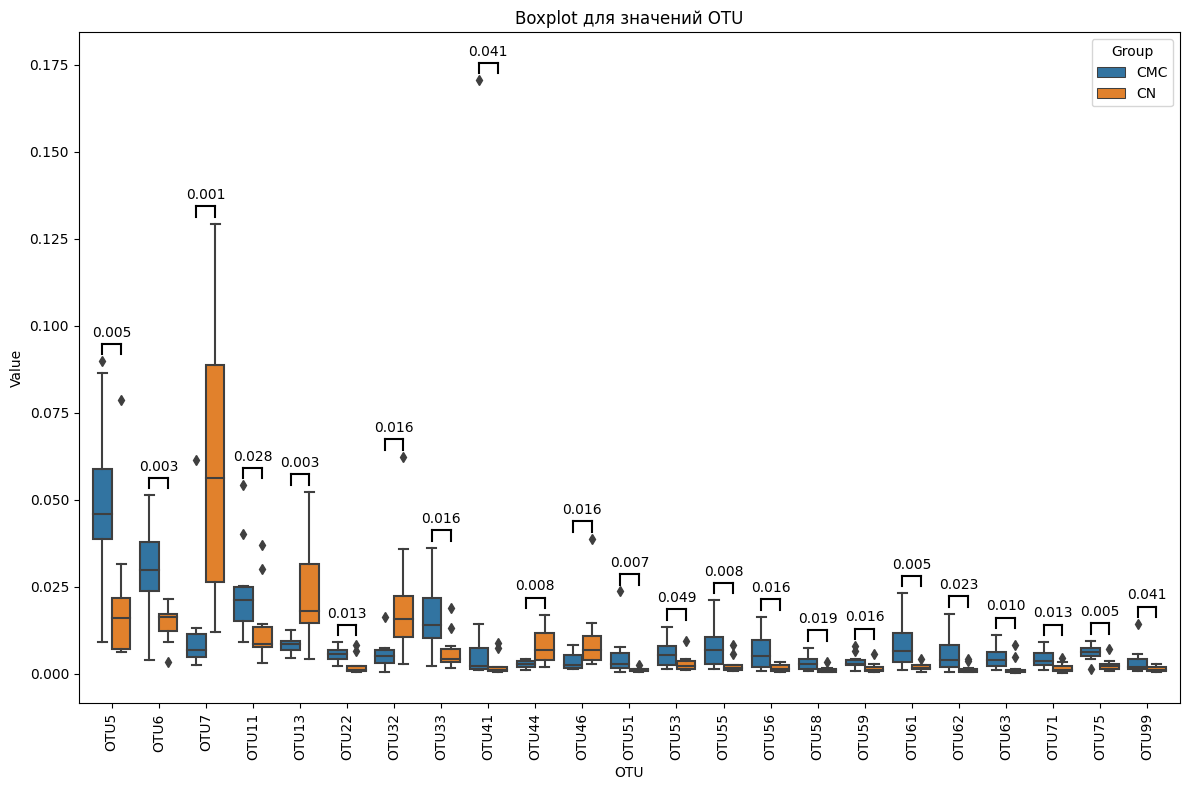

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Преобразуем данные в длинный формат с помощью функции melt в pandas
data_melt = merged_deleted_cmc_rel_dropped.melt(id_vars='Group', var_name='OTU', value_name='Value')

# Фильтруем данные только для групп CN и CMC
data_melt = data_melt[data_melt['Group'].isin(['CN', 'CMC'])]

# Создаем boxplot
plt.figure(figsize=(12, 8))
ax = sns.boxplot(data=data_melt, x='OTU', y='Value', hue='Group')

# Получаем значения p-value
p_values = less_zero_five_transposed.loc['Kruskal_pvalue'].to_dict()

# Находим максимальное значение y для каждого OTU
y_max_values = data_melt.groupby('OTU')['Value'].max()

# Выводим значения p-value и линии для групп 'CN' и 'CMC'
for i, otu in enumerate(data_melt['OTU'].unique()):
    p_value = p_values.get(otu, np.nan)

    # Если p_value является NaN, продолжаем
    if np.isnan(p_value):
        continue

    y_max = y_max_values[otu]
    height = 0.005
    ax.annotate(f'{p_value:.3f}', xy=(i, y_max + height), xytext=(0, 3),
                textcoords="offset points", ha='center', va='bottom', fontsize=10)

    # Добавляем вертикальные линии

    x1 = i - 0.2
    x2 = i + 0.2
    line_color = 'black'
    line_width = 1.5
    y_line = y_max + height  # Y-координата горизонтальной линии
    ax.plot([x1, x1], [y_max+.002, y_line], color=line_color, lw=line_width)
    ax.plot([x2, x2], [y_max+.002, y_line], color=line_color, lw=line_width)
    ax.plot([x1, x2], [y_line, y_line], color=line_color, lw=line_width)  # Горизонтальная линия



# Показываем график
plt.title('Boxplot для значений OTU')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('figures/realtive_ab/seaborn_boxplot.pdf', bbox_inches = 'tight')
plt.show()


In [16]:
import plotly.express as px
import numpy as np
import pandas as pd

# Преобразуем данные в длинный формат с помощью функции melt в pandas
data_melt = merged_deleted_cmc_rel_dropped.melt(id_vars='Group', var_name='OTU', value_name='Value')

# Получаем значения p-value
p_values = less_zero_five_transposed.loc['Kruskal_pvalue'].to_dict()

# Находим максимальное значение y для каждого OTU
y_max_values = data_melt.groupby('OTU')['Value'].max()

# Создаем словарь для аннотаций
annotations = []
for i, otu in enumerate(data_melt['OTU'].unique()):
    p_value = p_values.get(otu, np.nan)  # получаем p-value для каждого OTU
    if i%2 == 0:
        y_max = y_max_values[otu]+0.01
        annotations.append(dict(x=otu, y=y_max, text=f'p={p_value:.3f}', showarrow=False))
    else:
        y_max = y_max_values[otu]+0.07
        annotations.append(dict(x=otu, y=y_max, text=f'p={p_value:.3f}', showarrow=False))

# Создаем boxplot
fig = px.box(data_melt, x="OTU", y="Value", color="Group", points="all", 
             title='Boxplot for OTU values', 
             color_discrete_sequence=px.colors.qualitative.Vivid)  # здесь можно поменять цвета

fig.update_layout(
    annotations=annotations,  # Добавляем аннотации
    showlegend=True,
    plot_bgcolor='rgba(0,0,0,0)',  # задаем прозрачный фон
    width=1200,  # задаем ширину графика
    height=800,  # задаем высоту графика
)

# Убираем сетку и задаем границы
fig.update_xaxes(showgrid=False, zeroline=False, showline=True, linewidth=2, linecolor='black')
fig.update_yaxes(showgrid=False, zeroline=False, showline=True, linewidth=2, linecolor='black')
# Сохраняем график в статическом PNG формате
# import plotly.io as pio
# pio.kaleido.scope.executable = '/home/esp/python csv/Samat/rats27.07/vrats27.07/lib/python3.11/site-packages/kaleido/executable/bin/kaleido'
# fig.write_image("figures/realtive_ab/boxplot.png")


# Сохраняем график в интерактивном HTML формате
#fig.write_html("boxplot.html")


fig.show()


In [17]:
from skbio.diversity import alpha_diversity

merged_alpha = merged_deleted_cmc_rel_dropped.copy()
data_without_group = merged_alpha.drop(columns=['Group'])
data_without_group[data_without_group <= 0] = 1e-10
shannon_diversity = alpha_diversity('shannon', data_without_group)
simpson_diversity = alpha_diversity('simpson', data_without_group)

shannon_diversity.index = merged_alpha.index
simpson_diversity.index = merged_alpha.index

merged_alpha['Shannon'] = shannon_diversity
merged_alpha['Simpson'] = simpson_diversity

merged_alpha

,Group,OTU5,OTU6,OTU7,OTU11,OTU13,OTU22,OTU32,OTU33,OTU41,...,OTU58,OTU59,OTU61,OTU62,OTU63,OTU71,OTU75,OTU99,Shannon,Simpson
BA1,CMC,0.036648,0.017263,0.011700,0.025321,0.008768,0.005536,0.002959,0.010043,0.002240,...,0.003405,0.004097,0.017026,0.001830,0.002895,0.009069,0.006164,0.014286,4.018988,0.921953
BA10,CMC,0.045552,0.024354,0.004855,0.010232,0.008232,0.006302,0.005116,0.008926,0.001277,...,0.001960,0.002744,0.003237,0.003920,0.002231,0.003438,0.005850,0.002824,3.848163,0.896354
BA2,CMC,0.051196,0.027956,0.004041,0.016729,0.005113,0.009043,0.003366,0.016285,0.000921,...,0.007432,0.002430,0.003978,0.003962,0.002525,0.003557,0.006026,0.001048,3.807818,0.894677
BA3,CMC,0.061263,0.049940,0.061272,0.023460,0.008778,0.003904,0.016309,0.022395,0.014214,...,0.000684,0.003575,0.012665,0.008587,0.006588,0.002389,0.009488,0.001775,3.633951,0.886497
BA4,CMC,0.044868,0.023354,0.005453,0.054154,0.009756,0.006756,0.004868,0.019626,0.001284,...,0.004849,0.001830,0.023105,0.000326,0.001150,0.003019,0.004274,0.002118,3.573090,0.876818
BA5,CMC,0.009156,0.003877,0.002485,0.009037,0.010120,0.002057,0.000446,0.002266,0.170556,...,0.000728,0.000828,0.000992,0.000974,0.000892,0.000974,0.001192,0.001502,1.738089,0.425932
BA6,CMC,0.046164,0.031609,0.009947,0.022051,0.006758,0.003347,0.002499,0.010716,0.002261,...,0.003435,0.002768,0.001935,0.002332,0.005299,0.006584,0.006243,0.000682,3.712358,0.883871
BA7,CMC,0.089737,0.038536,0.004775,0.020515,0.007184,0.008649,0.007031,0.032441,0.000962,...,0.004265,0.006367,0.005388,0.015382,0.006657,0.005337,0.007610,0.005720,3.577745,0.859789
BA8,CMC,0.086355,0.051275,0.013097,0.039985,0.004447,0.004725,0.005878,0.036192,0.004750,...,0.001398,0.007930,0.007554,0.017184,0.011110,0.006197,0.009238,0.001406,3.570738,0.874363
BA9,CMC,0.034955,0.036193,0.007843,0.014422,0.012489,0.005642,0.007475,0.011919,0.008253,...,0.001205,0.002871,0.008672,0.006772,0.004679,0.001306,0.004813,0.004754,4.038064,0.918797
